In [3]:
# The Python standard library import
import sys
import os
import shutil
from pathlib import Path
print(str(Path().resolve()))
current_dir = str(Path().resolve())
sys.path.append(os.path.join(current_dir, '..'))

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import task

from pathlib import Path
# The NEAT-Python library imports
import modneat
# The helper used to visualize experiment results
from modneat import visualize

/home/kato-masahiro/Project/modneat-python/myexamples/investigate_utils


In [4]:
p = modneat.Checkpointer.restore_checkpoint('../results/task.xor_ModIndExHebbFFN_0/checkpoints/checkpoint-99')
t = task.xor(network_type = modneat.nn.ModIndExHebbFFN)

In [6]:
best_genome = p.run(t.eval_genomes, 1)
print(best_genome)

net = modneat.nn.IndExHebbFFN.create(best_genome, p.config)
fitness, log = t.eval_fitness(net, history_log = True)
print(fitness)
print("=====")
print(log[0])


Mean genetic distance 1.364, standard deviation 0.632
*** [WARNING] FileOutputReporter couldn't find a savepath ./results/task.xor_ModIndExHebbFFN_0/results.txt
Key: 10624
Fitness: 15.195789515422414
Nodes:
	0 ModNodeGene(key=0, bias=-0.03906633405492743, response=1.0, activation=tanh, aggregation=sum, modulatory=False)
Connections:
	ExHebbConnectionGene(key=(-2, 0), weight=-0.6739067573730873, enabled=True, a=0.21727778333323838, b=1.4983516769936012, c=1.5837460866131026, d=0.40914179619778973)
	ExHebbConnectionGene(key=(-1, 0), weight=0.7131160252779682, enabled=True, a=-0.9640471166915999, b=-0.806716226080835, c=1.4433207200767806, d=2.2143280563656176)
Global params:
	DefaultGlobalGene(key=0)
***: {'input_nodes': [-1, -2], 'output_nodes': [0], 'node_evals': [(0, <function tanh_activation at 0x149dc3663040>, <function sum_aggregation at 0x149dc3663d30>, -0.03906633405492743, 1.0, [(-1, 2.1208991166087436, -0.9640471166915999, -0.806716226080835, 1.4433207200767806, 2.2143280563656

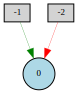

In [16]:
modneat.visualize.draw_net(p.config, best_genome, show_disabled=False)

Empty DataFrame
Columns: [step, node_id, value]
Index: []
{-1: 1.0, -2: 1.0, 0: 0.0003573346096747915}
(-1, 1.0)
(-2, 1.0)
(0, 0.0003573346096747915)
{-1: 1.0, -2: 0.0, 0: 0.9999396920659518}
(-1, 1.0)
(-2, 0.0)
(0, 0.9999396920659518)
{-1: 0.0, -2: 1.0, 0: 0.9999997609599056}
(-1, 0.0)
(-2, 1.0)
(0, 0.9999997609599056)
{-1: 0.0, -2: 0.0, 0: -0.0973564831215136}
(-1, 0.0)
(-2, 0.0)
(0, -0.0973564831215136)
    step  node_id     value
0    1.0     -1.0  1.000000
1    1.0     -2.0  1.000000
2    1.0      0.0  0.000357
3    2.0     -1.0  1.000000
4    2.0     -2.0  0.000000
5    2.0      0.0  0.999940
6    3.0     -1.0  0.000000
7    3.0     -2.0  1.000000
8    3.0      0.0  1.000000
9    4.0     -1.0  0.000000
10   4.0     -2.0  0.000000
11   4.0      0.0 -0.097356


<AxesSubplot:xlabel='node_id', ylabel='step'>

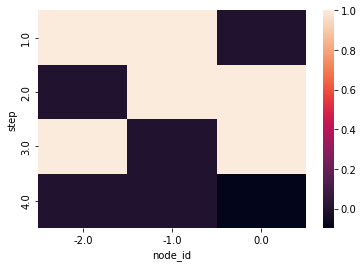

In [7]:
#ノードの活性化値の可視化
cols = ['step', 'node_id', 'value']
df = pd.DataFrame(index=[], columns = cols)
print(df)
value_history = [items['values'] for items in log]

step = 0
for values in value_history:
    step += 1
    print(values)
    for i in values.items():
        print(i)
        record = pd.Series([step, i[0], i[1]], index=df.columns)
        df = df.append(record, ignore_index=True)

print(df)

df_pivot = pd.pivot_table(data = df, values='value', columns='node_id', index='step')
sns.heatmap(df_pivot)

In [6]:
# The current working directory
#print(Path().resolve())
local_dir = os.path.join(str(Path().resolve()))
# The directory to store outputs
out_dir = str(os.path.join(local_dir, 'out'))

"""
The function to run XOR experiment against hyper-parameters 
defined in the provided configuration file.
The winner genome will be rendered as a graph as well as the
important statistics of neuroevolution process execution.
Arguments:
    config_file: the path to the file with experiment 
                configuration
"""
# 設定ファイルを読み込み
config_path = os.path.join(local_dir, 'exmodgenome_config.ini')
config = modneat.Config(modneat.ExModGenome, modneat.DefaultReproduction,
                     modneat.DefaultSpeciesSet, modneat.DefaultStagnation, 
                     config_path)

#初期個体群を生成、一つの個体を取得など
# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
p.add_reporter(stats)
p.add_reporter(neat.Checkpointer(5, filename_prefix='out/neat-checkpoint-'))


### 適当に個体群を生成して, そこから一つのネットワークを取得したい

#pop = neat.Population(config)
#print(p.population)
#print(p.species)
list(p.population.items()) #ゲノムのリストを取得
#print(list(p.population.items()))
print(len(list(p.population.items()))) #150
print(list(p.population.items())[0])

g = list(p.population.items())[0][1] #個体群の最初の個体の遺伝子を取得

#一つのfeedforwardNetworkの個体をgから生成する
net = modneat.nn.ExModFeedForwardNetwork.create(g, config)

150
(1, <modneat.genome.ExModGenome object at 0x7f8b597036d0>)


In [7]:
###色々中身を見てみる
print(' ::: 遺伝子::: \n', g, '\n')

print(' ::: 生成された表現型 ::: \n',net, '\n')

print(' ::: input_nodes ::: \n', net.input_nodes, '\n')

print(' ::: output_nodes ::: \n', net.output_nodes ,'\n')

#node_evalsは、各レイヤーごとに
# node, activate_function, aggregation_function, bias, response, linputs という要素が入ったリスト
print(' ::: node_evals[0] ::: \n', net.node_evals[0], '\n')
#for node, act_func, agg_func, bias, response, links in net.node_evals:
    #print(links)

print(' ::: values ::: \n', net.values, '\n')

#重みはどこ？？

#ネットワークを可視化する
# Visualize the experiment results
#node_names = {-1:'A', -2: 'B', 0:'A XOR B'}
#visualize.draw_net(config, g, True, node_names=None, directory=out_dir)

 ::: 遺伝子::: 
 Key: 1
Fitness: None
Nodes:
	0 ModNodeGene(key=0, bias=0.658368759145145, response=1.0, activation=sigmoid, aggregation=sum, modulatory=False)
Connections:
	ExHebbConnectionGene(key=(-2, 0), weight=0.5980351795353837, enabled=True, a=-1.1105708194837844, b=2.172653187511239, c=0.18552483687436755, d=0.2953755209694497)
	ExHebbConnectionGene(key=(-1, 0), weight=0.4434447394359, enabled=True, a=-0.4153047166318305, b=0.06323924022235183, c=-1.4378591996466805, d=2.3719473099454613) 

 ::: 生成された表現型 ::: 

 ::: input_nodes ::: 
 [-1, -2] 

 ::: output_nodes ::: 
 [0] 

 ::: node_evals[0] ::: 
 (0, False, <function sigmoid_activation at 0x7f8b289f63a0>, <function sum_aggregation at 0x7f8b28a041f0>, 0.658368759145145, 1.0, [(-1, 0.4434447394359, -0.4153047166318305, 0.06323924022235183, -1.4378591996466805, 2.3719473099454613), (-2, 0.5980351795353837, -1.1105708194837844, 2.172653187511239, 0.18552483687436755, 0.2953755209694497)]) 

 ::: values ::: 
 {-1: 0.0, -2: 0.0, 0: 0.0

---
inputs,self.input_nodes [1, -1] [-1, -2]
self.input_nodes: [-1, -2]
self.values: {0: 1.81614392363443e-07, 1: 0.9999999413309578, -2: -1, -1: 1}
self.node_evals: [(1, <function sigmoid_activation at 0x7fcd90052488>, <function sum_aggregation at 0x7fcdb02c1598>, 1.509334385522758, 1.0, [(-1, 1.1287625327616446), (-2, -0.6921737978176516)]), (0, <function sigmoid_activation at 0x7fcd90052488>, <function sum_aggregation at 0x7fcdb02c1598>, -1.4878819768651865, 1.0, [(1, 0), (-2, 0), (-1, 0)])]
---
inputs,self.input_nodes [1, -1] [-1, -2]
self.input_nodes: [-1, -2]
self.values: {0: 1.81614392363443e-07, 1: 0.9999999413309578, -2: -1, -1: 1}
self.node_evals: [(1, <function sigmoid_activation at 0x7fcd90052488>, <function sum_aggregation at 0x7fcdb02c1598>, 1.509334385522758, 1.0, [(-1, 1.1287625327616446), (-2, -0.6921737978176516)]), (0, <function sigmoid_activation at 0x7fcd90052488>, <function sum_aggregation at 0x7fcdb02c1598>, -1.4878819768651865, 1.0, [(1, 0), (-2, 0), (-1, 0)])]


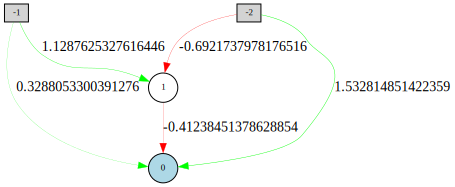

In [6]:
#単一の個体に対して入力->出力を得る
output = net.activate([1,-1])
print(output)
visualize.draw_net(config, g, True, node_names=None, directory=out_dir)

In [ ]:
print(net.)

In [7]:
#net.node_evals[0][5][0][1]
net.set_weight_val(input_node = -1, output_node =0, value=0)
net.set_weight_val(input_node = -2, output_node =0, value=0)
net.set_weight_val(input_node = 1, output_node =0, value=0)
print(net.node_evals)
visualize.draw_net(net)

1 2
ノード-1,0の間の重みを0にしました
1 1
ノード-2,0の間の重みを0にしました
1 0
ノード1,0の間の重みを0にしました
[(1, <function sigmoid_activation at 0x7fcd90052488>, <function sum_aggregation at 0x7fcdb02c1598>, 1.509334385522758, 1.0, [(-1, 1.1287625327616446), (-2, -0.6921737978176516)]), (0, <function sigmoid_activation at 0x7fcd90052488>, <function sum_aggregation at 0x7fcdb02c1598>, -1.4878819768651865, 1.0, [(1, 0), (-2, 0), (-1, 0)])]


TypeError: draw_net() missing 1 required positional argument: 'genome'

In [6]:
### 適当に個体群を生成して, そこから一つのネットワークを取得したい

pop = neat.Population(config)
#print(pop.population)
print(pop.species)
list(pop.population.items()) #ゲノムのリストを取得

g = list(pop.population.items())[0][1]
print('遺伝子:', g)

net = neat.nn.FeedForwardNetwork.create(g, config)
print('表現型:',net)
#print(type(net))

print('input_nodes')
print(net.input_nodes)

print('output_nodes')
print(net.output_nodes)

print('node_evals')
print(net.node_evals)
print(net.node_evals[0])

print('values')
print(net.values)

遺伝子: Key: 1
Fitness: None
Nodes:
	0 DefaultNodeGene(key=0, bias=0.9290311950374088, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=-1.1318087719324017, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=0.3122573204935441, enabled=True)
表現型: <neat.nn.feed_forward.FeedForwardNetwork object at 0x7f8699e0f940>
input_nodes
[-1, -2]
output_nodes
[0]
node_evals
[(0, <function sigmoid_activation at 0x7f8658053488>, <function sum_aggregation at 0x7f86990f0598>, 0.9290311950374088, 1.0, [(-1, 0.3122573204935441), (-2, -1.1318087719324017)])]
(0, <function sigmoid_activation at 0x7f8658053488>, <function sum_aggregation at 0x7f86990f0598>, 0.9290311950374088, 1.0, [(-1, 0.3122573204935441), (-2, -1.1318087719324017)])
values
{0: 0.0, -2: 0.0, -1: 0.0}


In [4]:
def clean_output():
    if os.path.isdir(out_dir):
        # remove files from previous run
        shutil.rmtree(out_dir)

    # create the output directory
    os.makedirs(out_dir, exist_ok=False)

In [17]:
# Run for up to 300 generations.
best_genome = p.run(eval_genomes, 300)
print(type(best_genome))

NameError: name 'eval_genomes' is not defined

In [19]:
# Display the best genome among generations.
print('\nBest genome:\n{!s}'.format(best_genome))

# Show output of the most fit genome against training data.
print('\nOutput:')
net = neat.nn.FeedForwardNetwork.create(best_genome, config)
for xi, xo in zip(xor_inputs, xor_outputs):
    output = net.activate(xi)
    print("input {!r}, expected output {!r}, got {!r}".format(xi, xo, output))


Best genome:
Key: 8982
Fitness: 15.6522167942852
Nodes:
	0 DefaultNodeGene(key=0, bias=-0.9093843855586577, response=1.0, activation=sigmoid, aggregation=sum)
	1011 DefaultNodeGene(key=1011, bias=-1.8190846212923804, response=1.0, activation=sigmoid, aggregation=sum)
	1521 DefaultNodeGene(key=1521, bias=-1.080282397236218, response=1.0, activation=sigmoid, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-2, 0), weight=-2.4840053630094694, enabled=True)
	DefaultConnectionGene(key=(-2, 1011), weight=2.7765611815684395, enabled=True)
	DefaultConnectionGene(key=(-2, 1521), weight=-0.02613607148710209, enabled=True)
	DefaultConnectionGene(key=(-1, 0), weight=1.5847680499351735, enabled=True)
	DefaultConnectionGene(key=(-1, 1011), weight=-0.44055113171912663, enabled=False)
	DefaultConnectionGene(key=(-1, 1521), weight=1.187616432186448, enabled=True)
	DefaultConnectionGene(key=(1011, 0), weight=11.883832694203981, enabled=True)
	DefaultConnectionGene(key=(1521, 1011), weight=-3.6